# Exploration

In [1]:
!pip install bsuite
!pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from bsuite import sweep
import warnings
from scipy.stats import ttest_ind
import seaborn as sns

sns.set_style("whitegrid")

In [3]:
custom_memory_sweep = (
    "memory_custom/0",
    "memory_custom/1",
    "memory_custom/2",
    "memory_custom/3",
    "memory_custom/4",
    "memory_custom/5",
    "memory_custom/6",
    "memory_custom/7",
    "memory_custom/8",
    "memory_custom/9",
    "memory_custom/10",
    "memory_custom/11",
    "memory_custom/12",
)

In [4]:
def get_experiments_df(memory_models, envs, seeds, save_dir, column_names):
    df_data = []
    for seed in seeds:
        for memory in memory_models:
            for env in envs:
                env_id_list = get_sweep_from_bsuite_id(env)
                for env_id in env_id_list:
                    env_id = env_id.replace("/", "-")
                    path_to_file = f"results/{seed}/{memory}/data/{save_dir}/{env_id}_log.csv"
                    if not os.path.exists(path_to_file):
                        warnings.warn(f"Path {path_to_file} doesn't exist. Skipping.")
                        continue
                    data = pd.read_csv(
                        path_to_file,
                        names=column_names,
                        index_col=None,
                        header=0,
                    )
                    data["Seed"] = seed
                    data["Memory"] = memory
                    data["Experiment"] = int(env_id.split("-")[-1])
                    data["Environment"] = env_id.split("-")[0]
                    df_data.append(data)
    df = pd.concat(df_data, axis=0, ignore_index=True)
    return df

In [5]:
def get_sweep_from_bsuite_id(bsuite_id: str):
    return {
        "memory_len": sweep.MEMORY_LEN,
        "memory_size": sweep.MEMORY_SIZE,
        "memory_custom": custom_memory_sweep, 
    }.get(bsuite_id, [bsuite_id])


## Memory Length Experiments 

In [6]:
memory_models = ["GTrXL", "Integrated Transformer", "LSTM", "Universal Transformer"]
envs = ["memory_len/13", "memory_len/19"]
seeds = [4, 5, 10, 92, 82, 35, 31, 79, 86, 24, 88, 55, 16, 90, 30, 60, 64, 42, 75, 83, 11, 52, 61, 57, 94, 39, 47, 49, 65, 81]

In [7]:
experiments = get_experiments_df(
    memory_models,
    envs,
    seeds,
    save_dir="eval",
    column_names=["Episode", "Average Score"],
)

In [8]:
experiments.head()

,Episode,Average Score,Seed,Memory,Experiment,Environment
0,100.0,1.00,4,GTrXL,13,memory_len
1,100.0,1.00,4,GTrXL,19,memory_len
2,100.0,0.02,4,Integrated Transformer,13,memory_len
3,100.0,1.00,4,Integrated Transformer,19,memory_len
4,100.0,1.00,4,LSTM,13,memory_len


## T-Tests 

### Memory Length 13

In [9]:
memory_1 = experiments[(experiments['Memory']=="LSTM") & (experiments['Experiment']==13)]
memory_2 = experiments[(experiments['Memory']=="GTrXL") & (experiments['Experiment']==13)]

stat, p = ttest_ind(memory_1['Average Score'], memory_2['Average Score'], equal_var=False)
print("Memory Length 13: LSTM vs GTrXL ")
print('T-Stat=%.3f, p=%.3f' % (stat, p))

Memory Length 13: LSTM vs GTrXL 
T-Stat=-0.745, p=0.459


In [10]:
memory_1 = experiments[(experiments['Memory']=="LSTM") & (experiments['Experiment']==13)]
memory_2 = experiments[(experiments['Memory']=="Integrated Transformer") & (experiments['Experiment']==13)]

stat, p = ttest_ind(memory_1['Average Score'], memory_2['Average Score'], equal_var=False)
print("Memory Length 13: LSTM vs Integrated Transformer ")
print('T-Stat=%.3f, p=%.3f' % (stat, p))

Memory Length 13: LSTM vs Integrated Transformer 
T-Stat=0.343, p=0.733


### Memory Length 19

In [11]:
memory_1 = experiments[(experiments['Memory']=="LSTM") & (experiments['Experiment']==19)]
memory_2 = experiments[(experiments['Memory']=="GTrXL") & (experiments['Experiment']==19)]

stat, p = ttest_ind(memory_1['Average Score'], memory_2['Average Score'], equal_var=False)
print("Memory Length 19: LSTM vs GTrXL ")
print('T-Stat=%.3f, p=%.3f' % (stat, p))

Memory Length 19: LSTM vs GTrXL 
T-Stat=-6.687, p=0.000


In [12]:
memory_1 = experiments[(experiments['Memory']=="LSTM") & (experiments['Experiment']==19)]
memory_2 = experiments[(experiments['Memory']=="Integrated Transformer") & (experiments['Experiment']==19)]

stat, p = ttest_ind(memory_1['Average Score'], memory_2['Average Score'], equal_var=False)
print("Memory Length 19: LSTM vs Integrated Transformer ")
print('T-Stat=%.3f, p=%.3f' % (stat, p))

Memory Length 19: LSTM vs Integrated Transformer 
T-Stat=-4.391, p=0.000


In [13]:
memory_1 = experiments[(experiments['Memory']=="LSTM") & (experiments['Experiment']==19)]
memory_2 = experiments[(experiments['Memory']=="Universal Transformer") & (experiments['Experiment']==19)]

stat, p = ttest_ind(memory_1['Average Score'], memory_2['Average Score'], equal_var=False)
print("Memory Length 19: LSTM vs Universal Transformer ")
print('T-Stat=%.3f, p=%.3f' % (stat, p))

Memory Length 19: LSTM vs Universal Transformer 
T-Stat=-4.343, p=0.000


In [14]:
memory_1 = experiments[(experiments['Memory']=="GTrXL") & (experiments['Experiment']==19)]
memory_2 = experiments[(experiments['Memory']=="Universal Transformer") & (experiments['Experiment']==19)]

stat, p = ttest_ind(memory_1['Average Score'], memory_2['Average Score'], equal_var=False)
print("Memory Length 19: GTrXL vs Universal Transformer ")
print('T-Stat=%.3f, p=%.3f' % (stat, p))

Memory Length 19: GTrXL vs Universal Transformer 
T-Stat=1.783, p=0.081


In [15]:
memory_1 = experiments[(experiments['Memory']=="GTrXL") & (experiments['Experiment']==19)]
memory_2 = experiments[(experiments['Memory']=="Integrated Transformer") & (experiments['Experiment']==19)]

stat, p = ttest_ind(memory_1['Average Score'], memory_2['Average Score'], equal_var=False)
print("Memory Length 19: GTrXL vs Integrated Transformer ")
print('T-Stat=%.3f, p=%.3f' % (stat, p))

Memory Length 19: GTrXL vs Integrated Transformer 
T-Stat=1.746, p=0.087


## Plot the Distribution of Scores

In [16]:
experiment_13 = experiments[experiments['Experiment']==13]
experiment_19 = experiments[experiments['Experiment']==19]

In [17]:
plot_data_13 = pd.pivot_table(experiment_13, values='Average Score', index=["Seed"], columns=['Memory'])
plot_data_19 = pd.pivot_table(experiment_19, values='Average Score', index=["Seed"], columns=['Memory'])

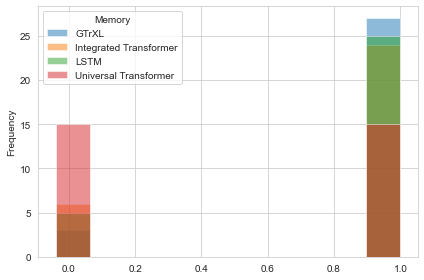

In [18]:
ax = plot_data_13.plot.hist(bins=10, alpha=0.5)
plt.tight_layout()
fig = ax.get_figure()
fig.savefig("memory_len_13_dist.jpg")

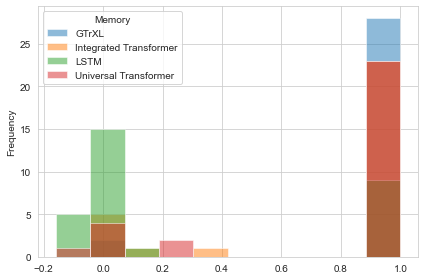

In [19]:
ax = plot_data_19.plot.hist(bins=10, alpha=0.5)
plt.tight_layout()
fig = ax.get_figure()
fig.savefig("memory_len_19_dist.jpg")

# Seed Sensitivity 

## Memory Length 13

In [20]:
mpl.rcParams.update(mpl.rcParamsDefault)
sns.set_style("whitegrid")

In [21]:
memory_models = ["LSTM", "GTrXL", "Integrated Transformer", "Universal Transformer", "ReZero", "Transformer-XL"]
envs = ["memory_len/13"]
seeds = [4, 5, 10, 92, 82, 35, 31, 79, 86, 24, 88, 55, 16, 90, 30, 60, 64, 42, 75, 83, 11, 52, 61, 57, 94, 39, 47, 49, 65, 81]
episodes = [2500, 5000, 10000]
memory_order = list(map(lambda x: x.replace(" ", "\n"), memory_models))

In [22]:
experiments = get_experiments_df(
    memory_models,
    envs,
    seeds,
    save_dir="training",
    column_names=["Episode", "Average Score", "Loss"],
)

In [23]:
def add_rank(x):
    x['Rank'] = range(1, 31)
    return x

In [24]:
experiments.head()

,Episode,Average Score,Loss,Seed,Memory,Experiment,Environment
0,100.0,0.02,10.613771,4,LSTM,13,memory_len
1,200.0,0.12,10.536920,4,LSTM,13,memory_len
2,300.0,-0.08,10.586241,4,LSTM,13,memory_len
3,400.0,0.06,10.553831,4,LSTM,13,memory_len
4,500.0,0.02,10.511009,4,LSTM,13,memory_len


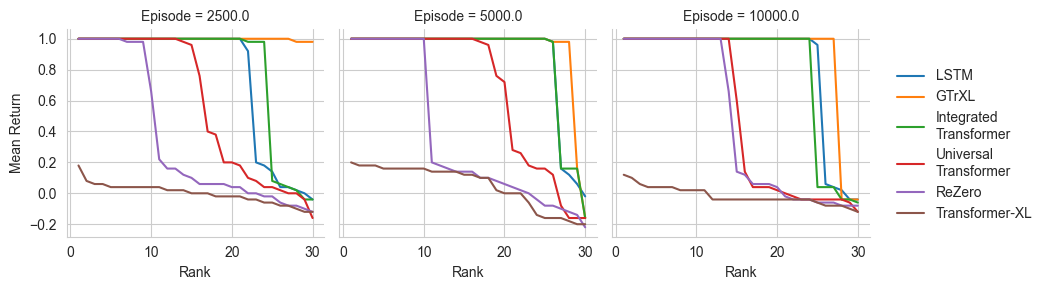

In [25]:
experiments = experiments[experiments.Episode.isin(episodes)]
experiments = experiments.sort_values(by=["Average Score"], axis=0, ascending=False)
experiments = experiments.groupby(["Episode", "Memory"]).apply(add_rank)
experiments.Memory = experiments.Memory.apply(lambda x: x.replace(" ", "\n"))

g = sns.FacetGrid(experiments, col="Episode", hue="Memory", hue_order=memory_order)
g.map_dataframe(sns.lineplot, x="Rank", y="Average Score")
g.set_axis_labels("Rank", "Mean Return")
g.add_legend(title="")
g.tight_layout()
# /Users/tommakkink/Code/transformers-for-rl/results/plots/training
env_name = envs[0].replace("/", "-")
g.savefig(f"results/plots/training/{env_name}_seed_analysis.png", dpi=300)

In [26]:
plt.show()

## Memory Length 19

In [27]:
mpl.rcParams.update(mpl.rcParamsDefault)
sns.set_style("whitegrid")

In [28]:
envs = ["memory_len/19"]

In [29]:
experiments = get_experiments_df(
    memory_models,
    envs,
    seeds,
    save_dir="training",
    column_names=["Episode", "Average Score", "Loss"],
)

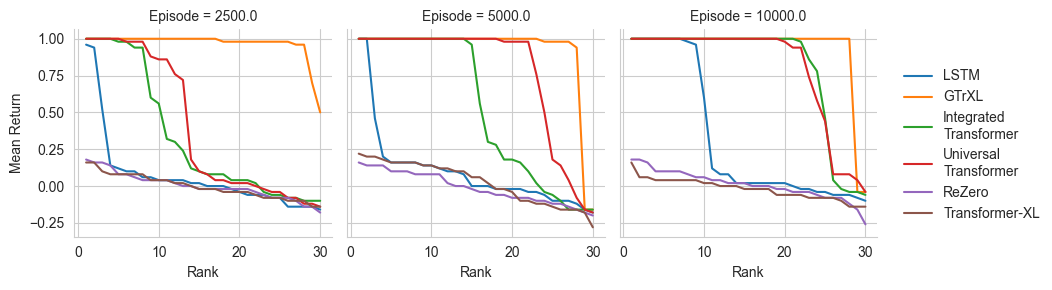

In [30]:
experiments = experiments[experiments.Episode.isin(episodes)]
experiments = experiments.sort_values(by=["Average Score"], axis=0, ascending=False)
experiments = experiments.groupby(["Episode", "Memory"]).apply(add_rank)
experiments.Memory = experiments.Memory.apply(lambda x: x.replace(" ", "\n"))
memory_models = ["LSTM", "GTrXL", "Universal\nTransformer", "Integrated\nTransformer", "ReZero"]

g = sns.FacetGrid(experiments, col="Episode", hue="Memory", hue_order=memory_order)
g.map_dataframe(sns.lineplot, x="Rank", y="Average Score")
g.set_axis_labels("Rank", "Mean Return")
g.add_legend(title="")
g.tight_layout()
# /Users/tommakkink/Code/transformers-for-rl/results/plots/training
env_name = envs[0].replace("/", "-")
g.savefig(f"results/plots/training/{env_name}_seed_analysis.png", dpi=300)

In [31]:
plt.show()

# Variance 

In [32]:
memory_models = ["No Memory", "LSTM", "GTrXL", "Universal Transformer", "Integrated Transformer", "ReZero", "Transformer-XL"]
envs = ["memory_len", "memory_size", "memory_custom"]
seeds = [4, 5, 10]
memory_order = list(map(lambda x: x.replace(" ", "\n"), memory_models))

In [33]:
experiments = get_experiments_df(
    memory_models,
    envs,
    seeds,
    save_dir="eval",
    column_names=["Episode", "Mean Return"],
)

In [34]:
experiments.head()

,Episode,Mean Return,Seed,Memory,Experiment,Environment
0,100.0,1.00,4,No Memory,0,memory_len
1,100.0,0.00,4,No Memory,1,memory_len
2,100.0,0.06,4,No Memory,2,memory_len
3,100.0,-0.04,4,No Memory,3,memory_len
4,100.0,-0.24,4,No Memory,4,memory_len


In [35]:
experiments = experiments[["Mean Return", "Environment"]]

In [36]:
experiments.head()

,Mean Return,Environment
0,1.00,memory_len
1,0.00,memory_len
2,0.06,memory_len
3,-0.04,memory_len
4,-0.24,memory_len


In [174]:
print("Number of Experiments")
print(f"Memory Length: {len(experiments[experiments.Environment == 'memory_len'])}")
print(f"Memory Size: {len(experiments[experiments.Environment == 'memory_size'])}")
print(f"Memory Custom: {len(experiments[experiments.Environment == 'memory_custom'])}")

Number of Experiments
Memory Length: 483
Memory Size: 357
Memory Custom: 273


In [184]:
a = 483 + 357 + 273
a

1113

In [177]:
def convert_name(name):
    if name == "memory_len":
        return "Memory Length"
    elif name == "memory_size":
        return "Memory Size"
    elif name == "memory_custom":
        return "Distributed Memory"
    else: 
        return None

In [178]:
experiments.Environment = experiments.Environment.apply(convert_name)

In [179]:
experiments.Environment.unique()

array(['Memory Length', 'Memory Size', 'Distributed Memory'], dtype=object)

In [1]:
experiments.head()

NameError: name 'experiments' is not defined

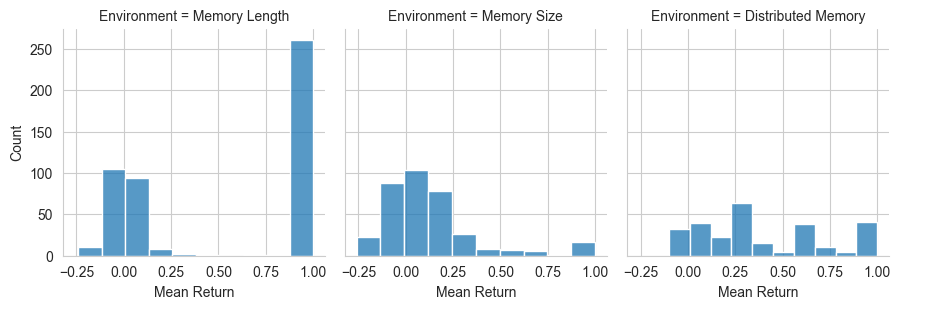

In [183]:
g = sns.FacetGrid(experiments, col="Environment")
g.map_dataframe(sns.histplot, x="Mean Return", bins=10)
g.add_legend(title="")
g.tight_layout()
g.set_axis_labels("Mean Return", "Count")
g.savefig(f"results/plots/training/seed_analysis.png", dpi=300)
plt.show()

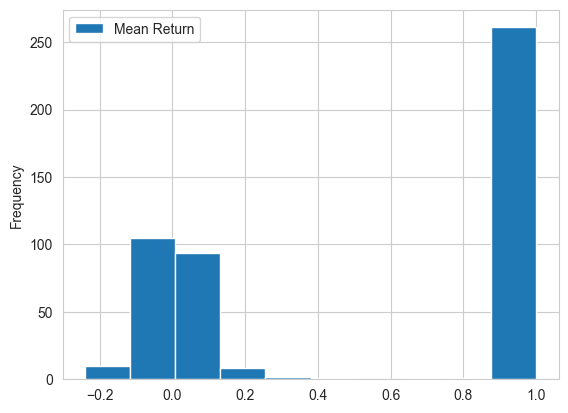

In [146]:
experiments.plot.hist(bins=10)
plt.savefig(f"results/plots/eval/seed_analysis_memory_len.png", dpi=300)
plt.show()

In [147]:
envs = ["memory_size"]

In [148]:
experiments = get_experiments_df(
    memory_models,
    envs,
    seeds,
    save_dir="eval",
    column_names=["Episode", "Mean Return"],
)

In [149]:
experiments = experiments[["Mean Return"]]

In [150]:
len(experiments)

357

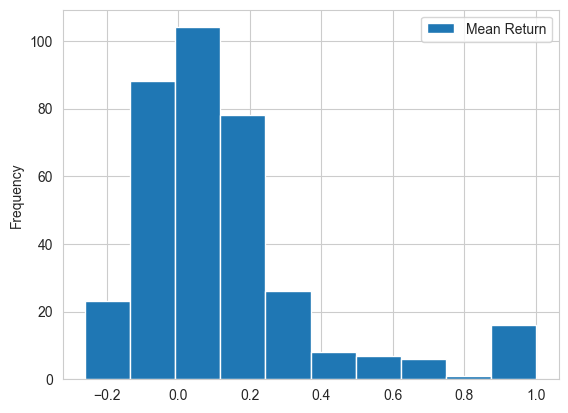

In [151]:
experiments.plot.hist(bins=10)
plt.savefig(f"results/plots/eval/seed_analysis_memory_size.png", dpi=300)
plt.show()

In [156]:
envs = ["memory_custom"]

In [157]:
experiments = get_experiments_df(
    memory_models,
    envs,
    seeds,
    save_dir="eval",
    column_names=["Episode", "Mean Return"],
)

In [158]:
experiments = experiments[["Mean Return"]]

In [159]:
len(experiments)

273

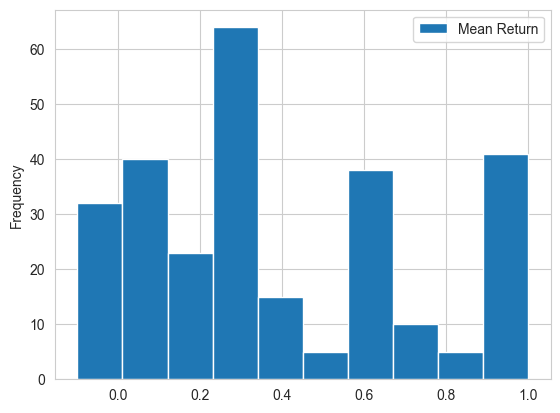

In [161]:
experiments.plot.hist(bins=10)
plt.savefig(f"results/plots/eval/seed_analysis_memory_custom.png", dpi=300)
plt.show()

# Total number of experiments conducted in this study. 

In [1]:
memory_models = ["No Memory", "LSTM", "GTrXL", "Universal Transformer", "Integrated Transformer", "ReZero", "Transformer-XL"]
envs = ["memory_len", "memory_size", "memory_custom"]
seeds = [4, 5, 10, 92, 82, 35, 31, 79, 86, 24, 88, 55, 16, 90, 30, 60, 64, 42, 75, 83, 11, 52, 61, 57, 94, 39, 47, 49, 65, 81]
memory_order = list(map(lambda x: x.replace(" ", "\n"), memory_models))

In [7]:
experiments = get_experiments_df(
    memory_models,
    envs,
    seeds,
    save_dir="eval",
    column_names=["Episode", "Mean Return"],
)

/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/92/No Memory/data/eval/memory_len-0_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init_path()
/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/92/No Memory/data/eval/memory_len-1_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init_path()
/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/92/No Memory/data/eval/memory_len-2_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init_path()
/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/92/No Memory/data/eval/memory_len-3_log.csv doesn't exist. Skipping.
  # This is added back by Interact

/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/82/Integrated Transformer/data/eval/memory_size-1_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init_path()
/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/82/Integrated Transformer/data/eval/memory_size-2_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init_path()
/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/82/Integrated Transformer/data/eval/memory_size-3_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init_path()
/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/82/Integrated Transformer/data/eval/memory_size-5_log.csv doe

/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/31/GTrXL/data/eval/memory_size-5_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init_path()
/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/31/GTrXL/data/eval/memory_size-6_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init_path()
/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/31/GTrXL/data/eval/memory_size-7_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init_path()
/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/31/GTrXL/data/eval/memory_size-8_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.

/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/86/LSTM/data/eval/memory_len-20_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init_path()
/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/86/LSTM/data/eval/memory_len-21_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init_path()
/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/86/LSTM/data/eval/memory_len-22_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init_path()
/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/86/LSTM/data/eval/memory_size-0_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init

/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/24/Transformer-XL/data/eval/memory_size-8_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init_path()
/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/24/Transformer-XL/data/eval/memory_size-10_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init_path()
/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/24/Transformer-XL/data/eval/memory_size-11_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init_path()
/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/24/Transformer-XL/data/eval/memory_size-12_log.csv doesn't exist. Skipping.
  # Thi

/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/55/ReZero/data/eval/memory_size-15_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init_path()
/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/55/ReZero/data/eval/memory_size-16_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init_path()
/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/55/ReZero/data/eval/memory_custom-0_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init_path()
/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/55/ReZero/data/eval/memory_custom-1_log.csv doesn't exist. Skipping.
  # This is added back by Interactiv

/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/90/ReZero/data/eval/memory_len-1_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init_path()
/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/90/ReZero/data/eval/memory_len-2_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init_path()
/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/90/ReZero/data/eval/memory_len-3_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init_path()
/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/90/ReZero/data/eval/memory_len-4_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.

/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/60/Integrated Transformer/data/eval/memory_len-14_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init_path()
/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/60/Integrated Transformer/data/eval/memory_len-15_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init_path()
/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/60/Integrated Transformer/data/eval/memory_len-16_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init_path()
/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/60/Integrated Transformer/data/eval/memory_len-17_log.csv doe

/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/42/GTrXL/data/eval/memory_custom-2_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init_path()
/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/42/GTrXL/data/eval/memory_custom-3_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init_path()
/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/42/GTrXL/data/eval/memory_custom-4_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init_path()
/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/42/GTrXL/data/eval/memory_custom-5_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveS

/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/83/LSTM/data/eval/memory_len-20_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init_path()
/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/83/LSTM/data/eval/memory_len-21_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init_path()
/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/83/LSTM/data/eval/memory_len-22_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init_path()
/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/83/LSTM/data/eval/memory_size-0_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init

/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/11/ReZero/data/eval/memory_len-18_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init_path()
/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/11/ReZero/data/eval/memory_len-20_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init_path()
/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/11/ReZero/data/eval/memory_len-21_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init_path()
/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/11/ReZero/data/eval/memory_len-22_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShell

/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/61/GTrXL/data/eval/memory_size-10_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init_path()
/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/61/GTrXL/data/eval/memory_size-11_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init_path()
/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/61/GTrXL/data/eval/memory_size-12_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init_path()
/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/61/GTrXL/data/eval/memory_size-13_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShell

/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/57/ReZero/data/eval/memory_size-5_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init_path()
/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/57/ReZero/data/eval/memory_size-6_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init_path()
/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/57/ReZero/data/eval/memory_size-7_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init_path()
/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/57/ReZero/data/eval/memory_size-8_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShell

/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/39/No Memory/data/eval/memory_len-0_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init_path()
/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/39/No Memory/data/eval/memory_len-1_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init_path()
/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/39/No Memory/data/eval/memory_len-2_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init_path()
/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/39/No Memory/data/eval/memory_len-3_log.csv doesn't exist. Skipping.
  # This is added back by Interact

/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/47/ReZero/data/eval/memory_len-14_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init_path()
/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/47/ReZero/data/eval/memory_len-15_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init_path()
/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/47/ReZero/data/eval/memory_len-16_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init_path()
/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/47/ReZero/data/eval/memory_len-17_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShell

/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/65/Universal Transformer/data/eval/memory_size-5_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init_path()
/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/65/Universal Transformer/data/eval/memory_size-6_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init_path()
/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/65/Universal Transformer/data/eval/memory_size-7_log.csv doesn't exist. Skipping.
  # This is added back by InteractiveShellApp.init_path()
/Users/tommakkink/miniconda3/envs/biondeep_local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Path results/65/Universal Transformer/data/eval/memory_size-8_log.csv doesn't

In [8]:
experiments.head()

,Episode,Mean Return,Seed,Memory,Experiment,Environment
0,100.0,1.00,4,No Memory,0,memory_len
1,100.0,0.00,4,No Memory,1,memory_len
2,100.0,0.06,4,No Memory,2,memory_len
3,100.0,-0.04,4,No Memory,3,memory_len
4,100.0,-0.24,4,No Memory,4,memory_len


In [12]:
len(experiments)

1828